#  Lab 1: Regression 
## Simple Linear Regression

In this notebook we are going to implement simple (one input) linear regression. You will be provided with some already complete code as well as some code that you should complete yourself. In particular, you will have to:
* Complete the function `paramEstimates` to implement linear regression algorithm.
* Complete the function `linearRegrNEWPredict` to implement linear regression algorithm.
* Complete the function `SSR` to compute the sum of squared residuals.



# Import libraries

The required libraries for this notebook are pandas, sklearn, numpy and matplotlib.

In [82]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
The data we are using is from ***regression data.csv***. It consists of 260 data points related to house prices where each data point has 9 features.

In [83]:
# Loading the CSV file
houseprice=pandas.read_csv('./datasets/regression_data.csv')
houseprice=houseprice[['Price (Older)', 'Price (New)']] # Choose 2 columns 
houseprice

,Price (Older),Price (New)
0,1524,2107
1,1542,2107
2,1542,2107
3,1524,2117
4,1542,2117
...,...,...
256,0,218725
257,0,216824
258,0,223315
259,0,224273


# Split data into training and testing

In [84]:
# Split the data
X=houseprice[['Price (Older)']]
Y=houseprice[['Price (New)']]

# Split the data into training and testing(75% training and 25% testing data)
xTrain,xTest,yTrain,yTest=train_test_split(X,Y, random_state=0)
#print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)
print(yTest)

     Price (New)
166        59102
106        22923
239       172052
76          6239
220       192268
..           ...
18          2369
188        86141
15          2318
161        61621
224       164457

[66 rows x 1 columns]


In [85]:
# Transform dataframes to numpy arrays
xTrain1=np.array(xTrain.values).flatten()
xTest1=np.array(xTest.values).flatten()
yTrain1=np.array(yTrain.values).flatten()
yTest1=np.array(yTest.values).flatten()

# Use simple linear regression from a library

We will first see how simple linear regression can be implemented using built-in functions from the scikit-learn library.

(195, 1) (195, 1)
[[ 62473.66124904]
 [ 33881.08265388]
 [172240.03893296]
 [ 23037.97658323]
 [188156.79582714]
 [ 62016.86656777]
 [ 20126.48725107]
 [ 22276.65211444]
 [ 20688.48313166]
 [ 64128.27309455]
 [ 71008.80065734]
 [ 21399.97545341]
 [164338.87517322]
 [ 37387.78929801]
 [ 64778.85945879]
 [ 21061.30141699]
 [169922.84409522]
 [ 18728.41868111]
 [ 52380.80583672]
 [ 64721.64477143]
 [161020.42330683]
 [ 20134.79260891]
 [ 21614.99193974]
 [ 18728.41868111]
 [122571.23058906]
 [ 64014.76653738]
 [ 25920.85857172]
 [168684.42295932]
 [ 22459.36998695]
 [171248.01007969]
 [ 27122.3670061 ]
 [ 27341.99758013]
 [ 40501.37567098]
 [ 28388.47266814]
 [126399.07773639]
 [ 37492.99049733]
 [ 42509.42663351]
 [ 75284.21431056]
 [172287.10262739]
 [ 48887.94145567]
 [ 20134.79260891]
 [ 20291.67159036]
 [ 73051.91868631]
 [ 38302.3014781 ]
 [ 20192.9301138 ]
 [ 72033.12812444]
 [ 70035.22815482]
 [198996.21062764]
 [154034.69454472]
 [ 45458.75148473]
 [ 21888.14593097]
 [ 20994.8585

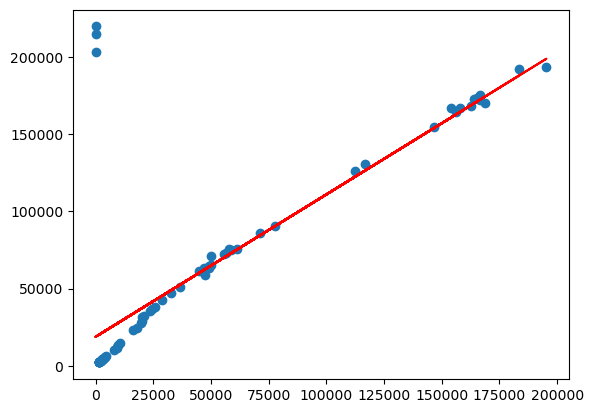

In [88]:
# sklearn functions implementation
def linearRegrPredict(xTrain, yTrain, xTest):
    # Create linear regression object
    regr=LinearRegression()
    # Train the model using the training sets
    print(xTrain.shape, yTrain.shape)
    regr.fit(xTrain, yTrain)
    # Make predictions using the testing set
    y_pred = regr.predict(xTest)
    #print("Accuracy Score:",regr.score(xTest,yTest))
    return y_pred


y_pred_scikit = linearRegrPredict(xTrain, yTrain, xTest)

print(y_pred_scikit)

# Plot testing set predictions
plt.scatter(xTest1, yTest1)
plt.plot(xTest1, y_pred_scikit, 'r-')
plt.show()





# Implement your own simple linear regression function 


You will be given the `paramEstimates(xTrain, yTrain)` function that estimates the linear regression parameters alpha and beta as follows:
\begin{align}
\hat{\beta} & =  \frac{\sum_{i=1}^n x_i\left(y_i - \bar{y} \right)}{\sum_{i=1}^n x_i\left(x_i - \bar{x} \right)}\\
\hat{\alpha} & = \bar{y}-\hat{\beta}\bar{x}
\end{align}

You have, however, to complete the `linearRegrNEWPredict(xTrain, yTrain, xTest)` function, or write your own, that returns the output variable y given the input x as follows: 
\begin{align}
\hat{y} & = \hat{\alpha}+\hat{\beta}x
\end{align}

***Remember that we train on `xTrain` and `yTrain`!***

In [69]:
# Transform dataframes to numpy arrays
xTrain1=np.array(xTrain.values).flatten()
xTest1=np.array(xTest.values).flatten()
yTrain1=np.array(yTrain.values).flatten()
yTest1=np.array(yTest.values).flatten()

print(yTest1)

[ 59102  22923 172052   6239 192268  63301   2127   5080   2994  64397
  73284   4062 166857  28830  64971   3377 173045 219881  50903  71021
 166980   2127   4243 214987 125937  63580  10504 168346   5352 173337
  11780  12265  35324  14508 130705  31557  38101  75618 175386  46907
   2117   2409  74853  32426   2217  75462  72714 193409 154907  42334
   4657   3326  37085 203122   5584 170263  90383  27839   4606  24716
  13144   2369  86141   2318  61621 164457]


[ 62473.66124904  33881.08265388 172240.03893296  23037.97658323
 188156.79582714  62016.86656777  20126.48725107  22276.65211444
  20688.48313166  64128.27309455  71008.80065734  21399.97545341
 164338.87517322  37387.78929801  64778.85945879  21061.30141699
 169922.84409522  18728.41868111  52380.80583672  64721.64477143
 161020.42330683  20134.79260891  21614.99193974  18728.41868111
 122571.23058906  64014.76653738  25920.85857172 168684.42295932
  22459.36998695 171248.01007969  27122.3670061   27341.99758013
  40501.37567098  28388.47266814 126399.07773639  37492.99049733
  42509.42663351  75284.21431056 172287.10262739  48887.94145567
  20134.79260891  20291.67159036  73051.91868631  38302.3014781
  20192.9301138   72033.12812444  70035.22815482 198996.21062764
 154034.69454472  45458.75148473  21888.14593097  20994.85855426
  41421.42475629  18728.41868111  22566.41682135 174587.68674945
  90531.0056722   36820.25651218  21863.22985745  35155.49367376
  27702.81923746  20266.75

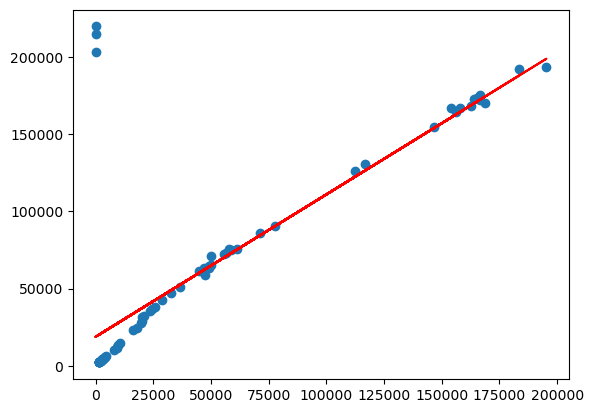

In [70]:
def paramEstimates(xTrain, yTrain):
    beta = np.sum(np.multiply(xTrain,(np.add(yTrain, -np.mean(yTrain))))) / np.sum(np.multiply(xTrain, (np.add(xTrain, - np.mean(xTrain)))))
    
    # Complete the code here.

    # alpha = ...
    alpha = np.mean(yTrain) - beta*np.mean(xTrain)
    ### SOLUTION --> alpha = np.mean(yTrain) - beta*np.mean(xTrain)
    
    return alpha, beta


def linearRegrNEWPredict(xTrain, yTrain,xTest):
    alpha, beta = paramEstimates(xTrain, yTrain)
    #print (alpha)
    #print(beta)
    # Complete the code here.
    #y_pred1 = ...
    
    #y_pred1 = alpha + beta*xTest
    y_pred1 =  np.add(alpha, np.multiply(beta,xTest))
    
    #### SOLUTION ---> y_pred1 =  np.add(alpha, np.multiply(beta,xTest))
    
    
    return y_pred1

 
y_pred1=linearRegrNEWPredict(xTrain1, yTrain1,xTest1)
print(y_pred1)


#Plot testing set predictions
plt.scatter(xTest, yTest)
plt.plot(xTest1, y_pred1, 'r-')
plt.show()



# Sum of Squared Residuals

You are now asked to write a simple function `SSR(y, y_pred)` that computes the sum of the squared
residuals (SSR). Remember that the SSR is the sum of the squares of the difference between the predicted outputs \\(\hat{y_i}\\) and the true output \\(y_i\\), as follows:
\begin{align}
SSR\left(y_i,\hat{y_i} \right) & =  \sum_{i=1}^n \left(y_i - \hat{y_i} \right)^2\\
\end{align}
Complete the following (or write your own) function to compute the SSR associated with the predictions delivered by your own or the library's implementation of simple linear regression.

In [81]:
def SSR(yTest, y_pred):
    # Complete the code here.
    #ssr = ...
    
    #print(y_pred.shape, yTest.shape)
    
    ssr = np.subtract(y_pred, yTest)
    print(ssr)
    ssr = np.square(ssr)
    print(ssr.shape)
    ssr = np.mean(ssr, axis=0)
    print(ssr.shape)
    
    #ssr = np.mean(np.square(np.subtract(y_pred, yTest)), axis=0)
    #### SOLUTION --> ssr = np.sum(np.subtract(yTest, y_pred)**2)
    #print(ssr.shape)
    
    return ssr


#print(yTest.shape ,y_pred.shape)
#print(yTest1.shape ,y_pred1.shape)



y_pred_SSR = SSR(yTest1, y_pred)
print("------------------------------------")
y_pred1_SSR = SSR(yTest1, y_pred1)

#print(y_pred_SSR)
#print(y_pred1_SSR)

#print("Scikit-learn linear regression SSR: %.4f" % y_pred_SSR)
#print("Our implementation of linear regression SSR: %.4f" % y_pred1_SSR)


[[   3371.66124904   39550.66124904 -109578.33875096 ...   60155.66124904
      852.66124904 -101983.33875096]
 [ -25220.91734612   10958.08265388 -138170.91734612 ...   31563.08265388
   -27739.91734612 -130575.91734612]
 [ 113138.03893296  149317.03893296     188.03893296 ...  169922.03893296
   110619.03893296    7783.03893296]
 ...
 [ -38868.46591453   -2689.46591453 -151818.46591453 ...   17915.53408547
   -41387.46591453 -144223.46591453]
 [    801.61440591   36980.61440591 -112148.38559409 ...   57585.61440591
    -1717.38559409 -104553.38559409]
 [ 103786.2060036   139965.2060036    -9163.7939964  ...  160570.2060036
   101267.2060036    -1568.7939964 ]]
(66, 66)
(66,)
------------------------------------
[ 3.37166125e+03  1.09580827e+04  1.88038933e+02  1.67989766e+04
 -4.11120417e+03 -1.28413343e+03  1.79994873e+04  1.71966521e+04
  1.76944831e+04 -2.68726905e+02 -2.27519934e+03  1.73379755e+04
 -2.51812483e+03  8.55778930e+03 -1.92140541e+02  1.76843014e+04
 -3.12215590e+03 